In [1]:
import os
import sys

sys.path.append(os.path.abspath('..'))
import modules.io as io

In [2]:
DATA_KEY    = "VAL"
CONFIG_FILE = "../config/resnet_6.yaml"
#CONFIG_FILE = "../config/i2i_regression.yaml"

LOAD = False

config      = io.load_yaml(CONFIG_FILE)
config['MODEL_DIR'] = config['MODEL_DIR'].replace('.','..')

In [3]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

239it [00:00, 3772.20it/s]
  2%|▏         | 5/239 [00:00<00:04, 47.50it/s]

centering images


100%|██████████| 239/239 [00:02<00:00, 94.40it/s]


In [4]:
import factories.model_factory as model_factory

model = model_factory.get(config)
if LOAD: model.load()

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[None, 3276800]


In [5]:
import factories.preprocessor_factory as prepro_factory

preprocessor = prepro_factory.get(config)

In [6]:
import numpy as np
X = 0.1*np.array([preprocessor(x) for x in data[0]])
print(X.shape)

(239, 160, 160, 1)


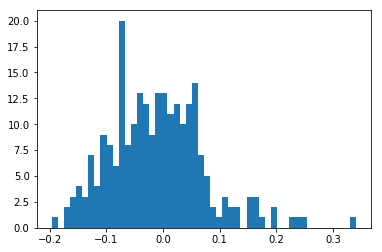

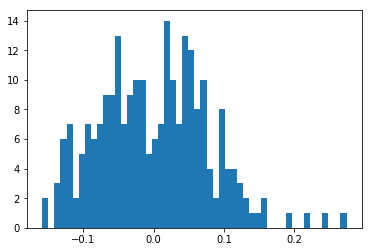

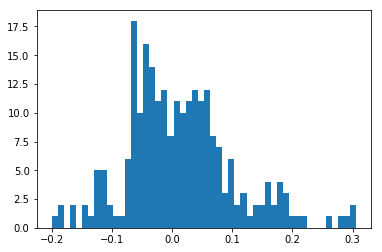

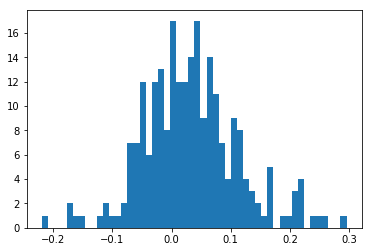

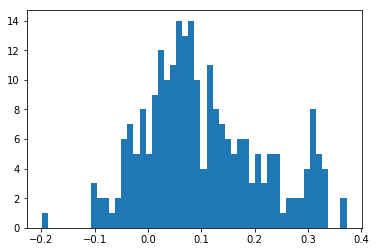

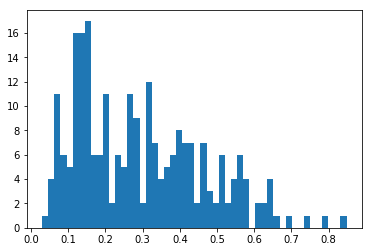

In [7]:
import matplotlib.pyplot as plt

mid = int(X.shape[1]/2)
xl = [-3,8]

plt.figure()
plt.hist(X[:,0,0,0],bins=50)
#plt.xlim(xl)
plt.show()

plt.figure()
plt.hist(X[:,20,20,0],bins=50)
#plt.xlim(xl)
plt.show()

plt.figure()
plt.hist(X[:,40,40,0],bins=50)
#plt.xlim(xl)
plt.show()

plt.figure()
plt.hist(X[:,60,60,0],bins=50)
#plt.xlim(xl)
plt.show()

plt.figure()
plt.hist(X[:,70,70,0],bins=50)
#plt.xlim(xl)
plt.show()

plt.figure()
plt.hist(X[:,mid,mid,0],bins=50)
#plt.xlim(xl)
plt.show()

In [8]:
import tensorflow as tf

In [9]:
tensor_list = [n.name for n in tf.get_default_graph().as_graph_def().node]
for t in tensor_list:
    print(t)

Placeholder
Placeholder_1
resnet/resblock_before/projection/random_normal/shape
resnet/resblock_before/projection/random_normal/mean
resnet/resblock_before/projection/random_normal/stddev
resnet/resblock_before/projection/random_normal/RandomStandardNormal
resnet/resblock_before/projection/random_normal/mul
resnet/resblock_before/projection/random_normal
resnet/resblock_before/projection/W
resnet/resblock_before/projection/W/Assign
resnet/resblock_before/projection/W/read
resnet/resblock_before/projection/zeros
resnet/resblock_before/projection/b
resnet/resblock_before/projection/b/Assign
resnet/resblock_before/projection/b/read
resnet/resblock_before/projection/convolution/dilation_rate
resnet/resblock_before/projection/convolution
resnet/resblock_before/projection/add
resnet/resblock_before/projection/Identity
resnet/resblock_before/res_0/conv_1/random_normal/shape
resnet/resblock_before/res_0/conv_1/random_normal/mean
resnet/resblock_before/res_0/conv_1/random_normal/stddev
resnet/r

resnet/resblock_after/res_14/conv_1/leaky_re_lu/Relu_1
resnet/resblock_after/res_14/conv_1/leaky_re_lu/Const
resnet/resblock_after/res_14/conv_1/leaky_re_lu/mul
resnet/resblock_after/res_14/conv_1/leaky_re_lu/sub
resnet/resblock_after/res_14/conv_2/random_normal/shape
resnet/resblock_after/res_14/conv_2/random_normal/mean
resnet/resblock_after/res_14/conv_2/random_normal/stddev
resnet/resblock_after/res_14/conv_2/random_normal/RandomStandardNormal
resnet/resblock_after/res_14/conv_2/random_normal/mul
resnet/resblock_after/res_14/conv_2/random_normal
resnet/resblock_after/res_14/conv_2/W
resnet/resblock_after/res_14/conv_2/W/Assign
resnet/resblock_after/res_14/conv_2/W/read
resnet/resblock_after/res_14/conv_2/zeros
resnet/resblock_after/res_14/conv_2/b
resnet/resblock_after/res_14/conv_2/b/Assign
resnet/resblock_after/res_14/conv_2/b/read
resnet/resblock_after/res_14/conv_2/convolution/dilation_rate
resnet/resblock_after/res_14/conv_2/convolution
resnet/resblock_after/res_14/conv_2/add


gradients/resnet/resblock_after/res_8/conv_2/leaky_re_lu/sub_grad/Neg
gradients/resnet/resblock_after/res_8/conv_2/leaky_re_lu/sub_grad/Reshape_1
gradients/resnet/resblock_after/res_8/conv_2/leaky_re_lu/sub_grad/tuple/group_deps
gradients/resnet/resblock_after/res_8/conv_2/leaky_re_lu/sub_grad/tuple/control_dependency
gradients/resnet/resblock_after/res_8/conv_2/leaky_re_lu/sub_grad/tuple/control_dependency_1
gradients/resnet/resblock_after/res_8/conv_2/leaky_re_lu/Relu_1_grad/ReluGrad
gradients/resnet/resblock_after/res_8/conv_2/leaky_re_lu/mul_grad/Shape
gradients/resnet/resblock_after/res_8/conv_2/leaky_re_lu/mul_grad/Shape_1
gradients/resnet/resblock_after/res_8/conv_2/leaky_re_lu/mul_grad/BroadcastGradientArgs
gradients/resnet/resblock_after/res_8/conv_2/leaky_re_lu/mul_grad/Mul
gradients/resnet/resblock_after/res_8/conv_2/leaky_re_lu/mul_grad/Sum
gradients/resnet/resblock_after/res_8/conv_2/leaky_re_lu/mul_grad/Reshape
gradients/resnet/resblock_after/res_8/conv_2/leaky_re_lu/mul_

gradients/resnet/resblock_before/res_12/conv_3/convolution_grad/Conv2DBackpropInput
gradients/resnet/resblock_before/res_12/conv_3/convolution_grad/Conv2DBackpropFilter
gradients/resnet/resblock_before/res_12/conv_3/convolution_grad/tuple/group_deps
gradients/resnet/resblock_before/res_12/conv_3/convolution_grad/tuple/control_dependency
gradients/resnet/resblock_before/res_12/conv_3/convolution_grad/tuple/control_dependency_1
gradients/resnet/resblock_before/res_12/conv_2/leaky_re_lu/sub_grad/Shape
gradients/resnet/resblock_before/res_12/conv_2/leaky_re_lu/sub_grad/Shape_1
gradients/resnet/resblock_before/res_12/conv_2/leaky_re_lu/sub_grad/BroadcastGradientArgs
gradients/resnet/resblock_before/res_12/conv_2/leaky_re_lu/sub_grad/Sum
gradients/resnet/resblock_before/res_12/conv_2/leaky_re_lu/sub_grad/Reshape
gradients/resnet/resblock_before/res_12/conv_2/leaky_re_lu/sub_grad/Sum_1
gradients/resnet/resblock_before/res_12/conv_2/leaky_re_lu/sub_grad/Neg
gradients/resnet/resblock_before/res

clip_by_value_241/y
clip_by_value_241
clip_by_value_242/Minimum/y
clip_by_value_242/Minimum
clip_by_value_242/y
clip_by_value_242
clip_by_value_243/Minimum/y
clip_by_value_243/Minimum
clip_by_value_243/y
clip_by_value_243
clip_by_value_244/Minimum/y
clip_by_value_244/Minimum
clip_by_value_244/y
clip_by_value_244
clip_by_value_245/Minimum/y
clip_by_value_245/Minimum
clip_by_value_245/y
clip_by_value_245
clip_by_value_246/Minimum/y
clip_by_value_246/Minimum
clip_by_value_246/y
clip_by_value_246
clip_by_value_247/Minimum/y
clip_by_value_247/Minimum
clip_by_value_247/y
clip_by_value_247
beta1_power/initial_value
beta1_power
beta1_power/Assign
beta1_power/read
beta2_power/initial_value
beta2_power
beta2_power/Assign
beta2_power/read
resnet/resblock_before/projection/W/Adam/Initializer/zeros
resnet/resblock_before/projection/W/Adam
resnet/resblock_before/projection/W/Adam/Assign
resnet/resblock_before/projection/W/Adam/read
resnet/resblock_before/projection/W/Adam_1/Initializer/zeros
resnet/

fc_final/W/Adam_1
fc_final/W/Adam_1/Assign
fc_final/W/Adam_1/read
fc_final/b/Adam/Initializer/zeros
fc_final/b/Adam
fc_final/b/Adam/Assign
fc_final/b/Adam/read
fc_final/b/Adam_1/Initializer/zeros
fc_final/b/Adam_1
fc_final/b/Adam_1/Assign
fc_final/b/Adam_1/read
Adam/beta1
Adam/beta2
Adam/epsilon
Adam/update_resnet/resblock_before/projection/W/ApplyAdam
Adam/update_resnet/resblock_before/projection/b/ApplyAdam
Adam/update_resnet/resblock_before/res_0/conv_1/W/ApplyAdam
Adam/update_resnet/resblock_before/res_0/conv_1/b/ApplyAdam
Adam/update_resnet/resblock_before/res_0/conv_2/W/ApplyAdam
Adam/update_resnet/resblock_before/res_0/conv_2/b/ApplyAdam
Adam/update_resnet/resblock_before/res_0/conv_3/W/ApplyAdam
Adam/update_resnet/resblock_before/res_0/conv_3/b/ApplyAdam
Adam/update_resnet/resblock_before/res_1/conv_1/W/ApplyAdam
Adam/update_resnet/resblock_before/res_1/conv_1/b/ApplyAdam
Adam/update_resnet/resblock_before/res_1/conv_2/W/ApplyAdam
Adam/update_resnet/resblock_before/res_1/conv_2

In [10]:
#############################
# ResNet
#############################
N=int(config['NLAYERS']/2)
#convs = ['conv_1', 'conv_2', 'conv_3']
convs = ['conv_3']
ops_before = []
for i in range(N):
    for c in convs:
        s = 'resnet/resblock_before/res_{}/{}/add:0'.format(i,c)
        
        op = tf.get_default_graph().get_tensor_by_name(s)
        ops_before.append(op)
        
ops_after = []
for i in range(N):
    for c in convs:
        s = 'resnet/resblock_after/res_{}/{}/add:0'.format(i,c)
        
        op = tf.get_default_graph().get_tensor_by_name(s)
        ops_after.append(op)
        
ops = ops_before+ops_after

In [11]:
#############################
# I2INet
#############################
# names = [
#     "block1/conv2d/add:0",
#     "block1/conv2d_1/add:0",
#     "block2/conv2d/add:0",
#     "block2/conv2d_1/add:0",
#     "block3/conv2d/add:0",
#     "block3/conv2d_1/add:0",
#     "block4/conv2d/add:0",
#     "block4/conv2d_1/add:0",
#     "ublock1/conv2d/add:0",
#     "ublock1/conv2d_1/add:0",
#     "ublock1/conv2d_2/add:0",
#     "ublock2/conv2d/add:0",
#     "ublock2/conv2d_1/add:0",
#     "ublock2/conv2d_2/add:0",
#     "ublock3/conv2d/add:0",
#     "ublock3/conv2d_1/add:0",
#     "ublock3/conv2d_2/add:0",
#     "conv2d/add:0"    
# ]

# ops = []

# for n in names:      
#     op = tf.get_default_graph().get_tensor_by_name(n)
#     ops.append(op)

In [12]:
nb = 8
xb = X[:nb,:,:]
outs = []
for op in ops:
    out = model.sess.run(op,{model.x:xb})
    print(out.shape)
    outs.append(out)

(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)
(8, 160, 160, 128)


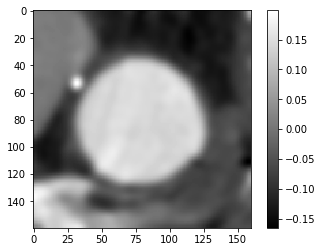

0


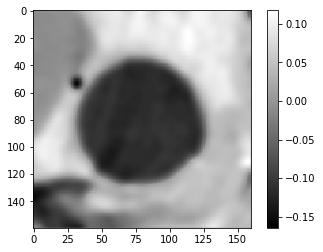

1


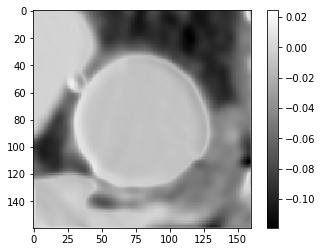

2


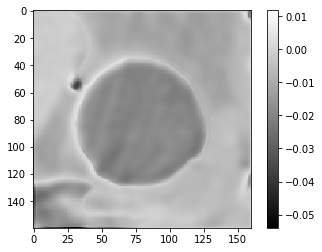

3


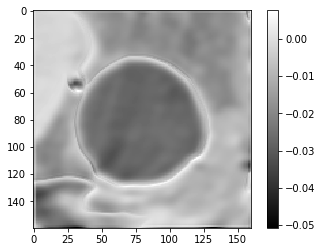

4


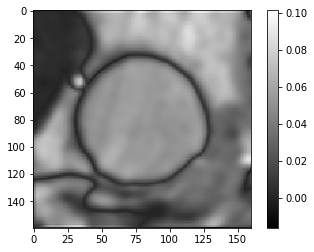

5


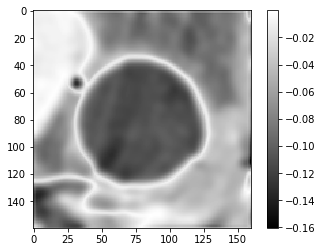

6


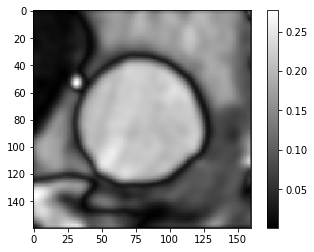

7


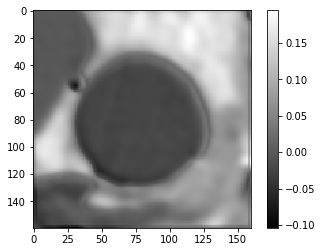

8


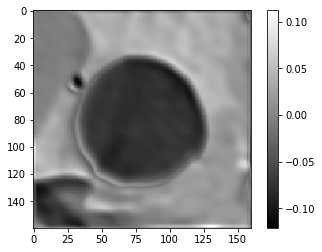

9


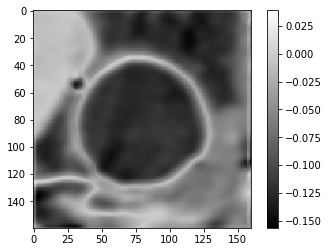

10


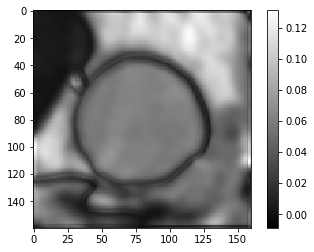

11


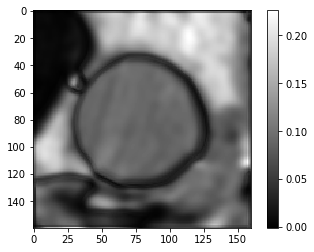

12


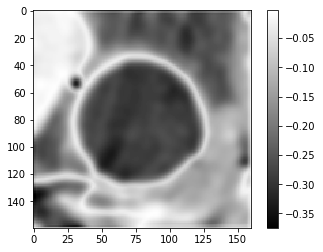

13


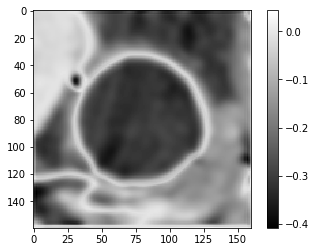

14


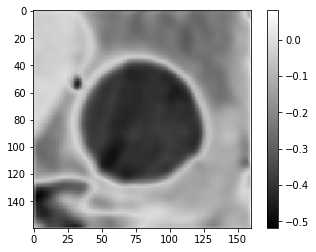

15


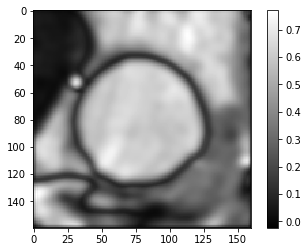

16


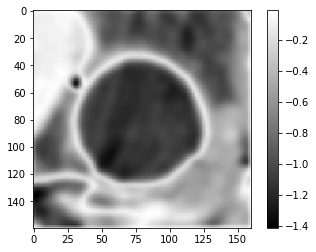

17


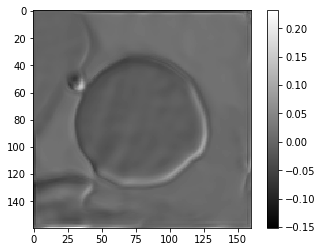

18


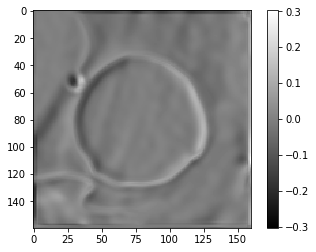

19


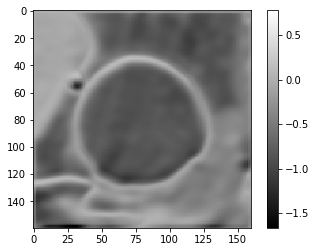

20


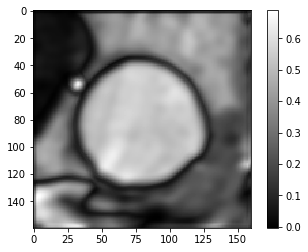

21


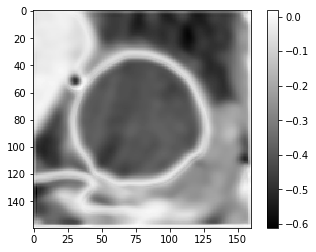

22


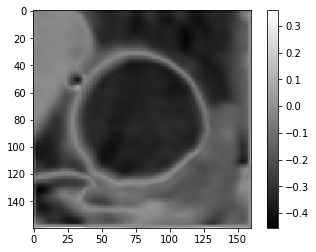

23


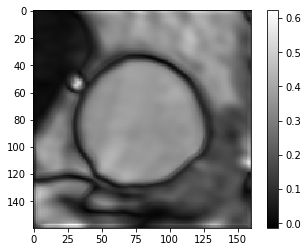

24


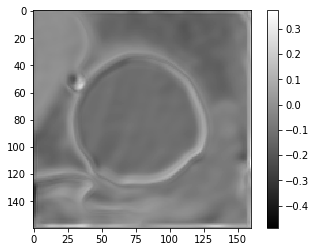

25


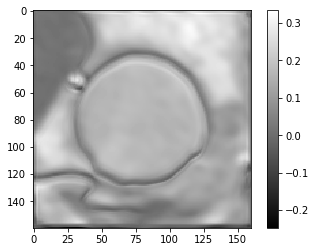

26


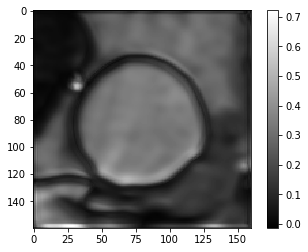

27


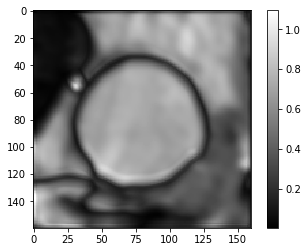

28


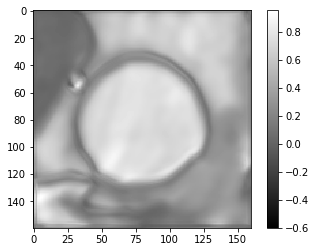

29


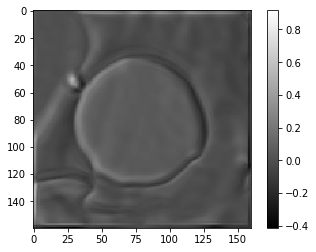

30


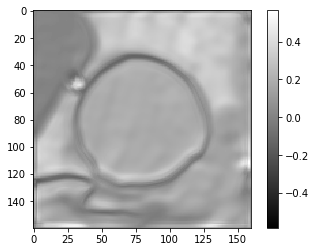

31


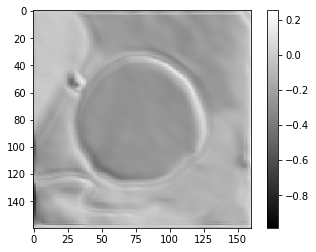

32


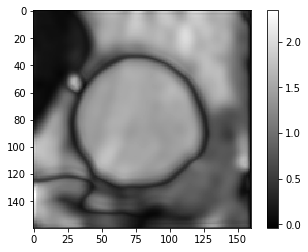

33


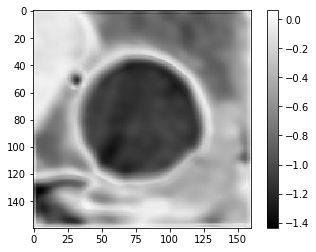

34


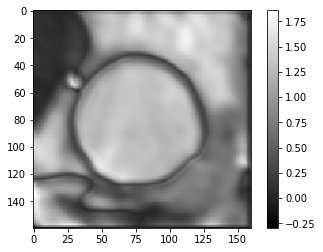

35


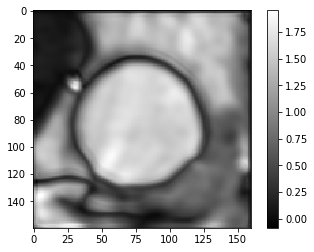

36


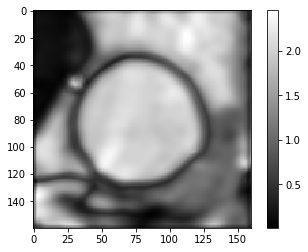

37


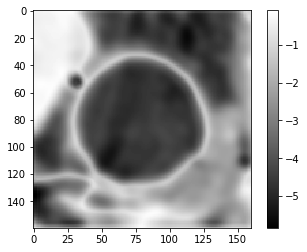

38


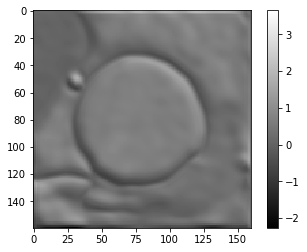

39


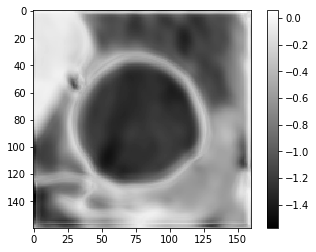

In [13]:
plt.figure()
plt.imshow(xb[0,:,:,0], cmap='gray')
plt.colorbar()
plt.show()

for i,o in enumerate(outs):
    k = np.random.randint(o.shape[3])
    y = o[0,:,:,k]
    
    print(i)
    plt.figure()
    plt.imshow(y, cmap='gray')
    plt.colorbar()
    plt.show()

In [15]:
s = 'fc_final/add:0'
op = tf.get_default_graph().get_tensor_by_name(s)
yhat = model.sess.run(op,{model.x:xb})

for y in yhat:
    print(y)

[-2.349503   -3.4472015  -0.19404188 -4.112089   -3.5280628   1.2270185
 -6.8146048   0.51113504  3.346129    1.871798   -0.3324419  -0.25887507
 -1.3339646   3.8260043  -0.69890165]
[-0.82394105 -2.3612628   2.3046954  -0.96229553 -5.4611073  -0.9277493
 -3.6516306   0.29263142  4.9026103   1.6298374  -0.82777816 -0.47918928
 -0.6447144   3.789345    2.389002  ]
[ 1.2151899  -0.47449726  0.1811653  -0.3028319  -5.6096115   2.6371734
 -3.905077   -0.4807816   4.4237504   2.8503323   1.5044594  -0.2748133
 -2.203794    2.3919654   2.4671886 ]
[ 1.7916907  -0.06120382  1.0849159  -1.0368197  -3.8194551   2.4398825
 -4.532893    0.16972682  4.3338466   4.2142935   1.7040515   0.04237663
 -4.1502223   2.3716214   1.7856807 ]
[ 1.2068974  -0.02323323  1.5254533  -2.5435166  -3.401169    1.58894
 -5.87694    -1.1069138   3.1924744   2.1153228   0.26258734  0.9496083
 -3.6656063   3.7638743   2.0068486 ]
[ 2.1741588  -1.9810858   1.9304805  -3.0794349  -4.532408    1.7099668
 -5.6070046  -0.7